In [223]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [224]:
import warnings
warnings.filterwarnings('ignore')

In [225]:
dataset = pd.read_csv('./Melbourne_housing_FULL.csv')
# dataset.head()

In [226]:
# dataset.nunique()

In [227]:
dataset.shape

(34857, 21)

In [228]:
cols_to_use = ['Suburb','Rooms','Type','Method','SellerG','Regionname','Propertycount', 
              'Distance','CouncilArea','Bedroom2','Bathroom','Car','Landsize','BuildingArea', 'Price']
# cols_to_use = ['Price','Landsize','BuildingArea','Distance','Rooms','Bedroom2','Bathroom','Car']
# #                'Suburb','Type','Method']
dataset = dataset[cols_to_use]
dataset.head()
dataset.shape

(34857, 15)

In [229]:
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [230]:
cols_to_fill_zero = ['Propertycount','Distance','Bedroom2','Bathroom','Car']
# cols_to_fill_zero = ['Distance','Bedroom2','Bathroom','Car']

dataset[cols_to_fill_zero] = dataset[cols_to_fill_zero].fillna(0)
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        0
Distance             0
CouncilArea          3
Bedroom2             0
Bathroom             0
Car                  0
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [231]:
dataset['Landsize'] = dataset['Landsize'].fillna(dataset.Landsize.mean())
dataset['Landsize'] = dataset['Landsize'].   replace(0,dataset.Landsize.mean())
dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset.BuildingArea.mean())
# dataset[dataset["Rooms"   ] >= 8] = np.nan
# dataset[dataset["Bedroom2"] >= 8] = np.nan
# dataset[dataset["Bathroom"] >= 5] = np.nan
# dataset[dataset["Car"     ] >= 5] = np.nan
dataset.isna().sum()

Suburb              0
Rooms               0
Type                0
Method              0
SellerG             0
Regionname          3
Propertycount       0
Distance            0
CouncilArea         3
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
Price            7610
dtype: int64

In [232]:
dataset.dropna(inplace=True)
dataset.isna().sum()

Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Price            0
dtype: int64

In [234]:

dataset = pd.get_dummies(dataset,drop_first=True)
dataset.head()
dataset.to_csv('myDataFrame.csv')


In [235]:
# dataset = pd.read_csv('./myDataFrame.csv')
# dataset = dataset.drop('Unnamed: 0', axis = 1)
dataset.head()
dataset.isnull().any()

Rooms                                     False
Propertycount                             False
Distance                                  False
Bedroom2                                  False
Bathroom                                  False
                                          ...  
CouncilArea_Whitehorse City Council       False
CouncilArea_Whittlesea City Council       False
CouncilArea_Wyndham City Council          False
CouncilArea_Yarra City Council            False
CouncilArea_Yarra Ranges Shire Council    False
Length: 745, dtype: bool

In [262]:
X = dataset.drop('Price', axis = 1)
X = np.asarray(X)
print(X.shape)
y = dataset['Price']
y = np.asarray(y)
print(y.shape)

 

(27244, 744)
(27244,)


In [263]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler
# from sklearn.datasets import  fetch_california_housing

# housing = fetch_california_housing()
# print(housing.data.shape)
X_train_full, X_test , y_train_full, y_test  = train_test_split(housing.data, housing.target, test_size = 0.3, random_state = 2)

X_train_full, X_test , y_train_full, y_test  = train_test_split(X, y)
X_train     , X_valid, y_train     , y_valid = train_test_split(X_train_full, y_train_full)

# scaler = StandardScaler()
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test  = scaler.fit_transform(X_test)

y_train = np.log1p(y_train)
y_valid = np.log1p(X_valid)
y_test  = np.log1p(y_test)


In [267]:
from tensorflow import keras
model = keras.models.Sequential()
print(X_train.shape[1:])
# print(X[1:])
model.add(keras.layers.Dense(30, activation = "sigmoid", input_shape = X_train.shape[1:]))
model.add(keras.layers.Dense(30, activation = "sigmoid"))
model.add(keras.layers.Dense(1))

model.compile(loss = "mean_squared_error", optimizer = "sgd")

(744,)


In [268]:
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
print(mse_test)

ValueError: A target array with shape (5109, 744) was passed for an output of shape (None, 1) while using as loss `mean_squared_error`. This loss expects targets to have the same shape as the output.

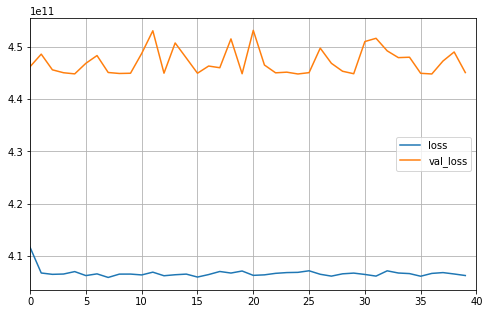

In [251]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
# plt.gca().set_ylim(.3e12,.5e12)
plt.gca().set_xlim(0,40)
plt.show()

In [256]:
print(mse_test)
X_new = X_test[:3]
print(X_new)
y_prep = model.predict(X_new)

402910092298.0731
[[0.26666667 0.09030619 0.05405405 ... 0.         0.         0.        ]
 [0.26666667 0.12525281 0.21205821 ... 0.         0.         0.        ]
 [0.06666667 0.60444005 0.1039501  ... 0.         0.         0.        ]]
